# หนังสือ Data Science วิเคราะห์การตลาด ด้วย Python
---
### บทที่ 5 การประเมินและการเลือกการแบ่งกลุ่มที่ดีที่สุด

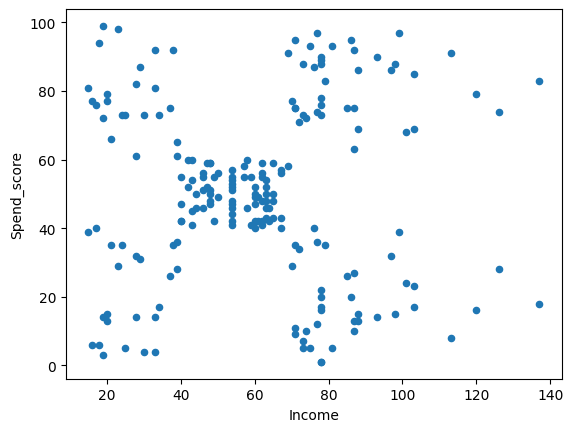

In [31]:
# ตัวอย่าง 5.1
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

df = pd.read_csv("data/Mall_Customers.csv")
df.head(3)

df.rename({'Annual Income (k$)':'Income',
           'Spending Score (1-100)':'Spend_score'},
          axis=1, inplace=True)
df.head(3)


df.plot.scatter(x='Income', y='Spend_score')
plt.show()

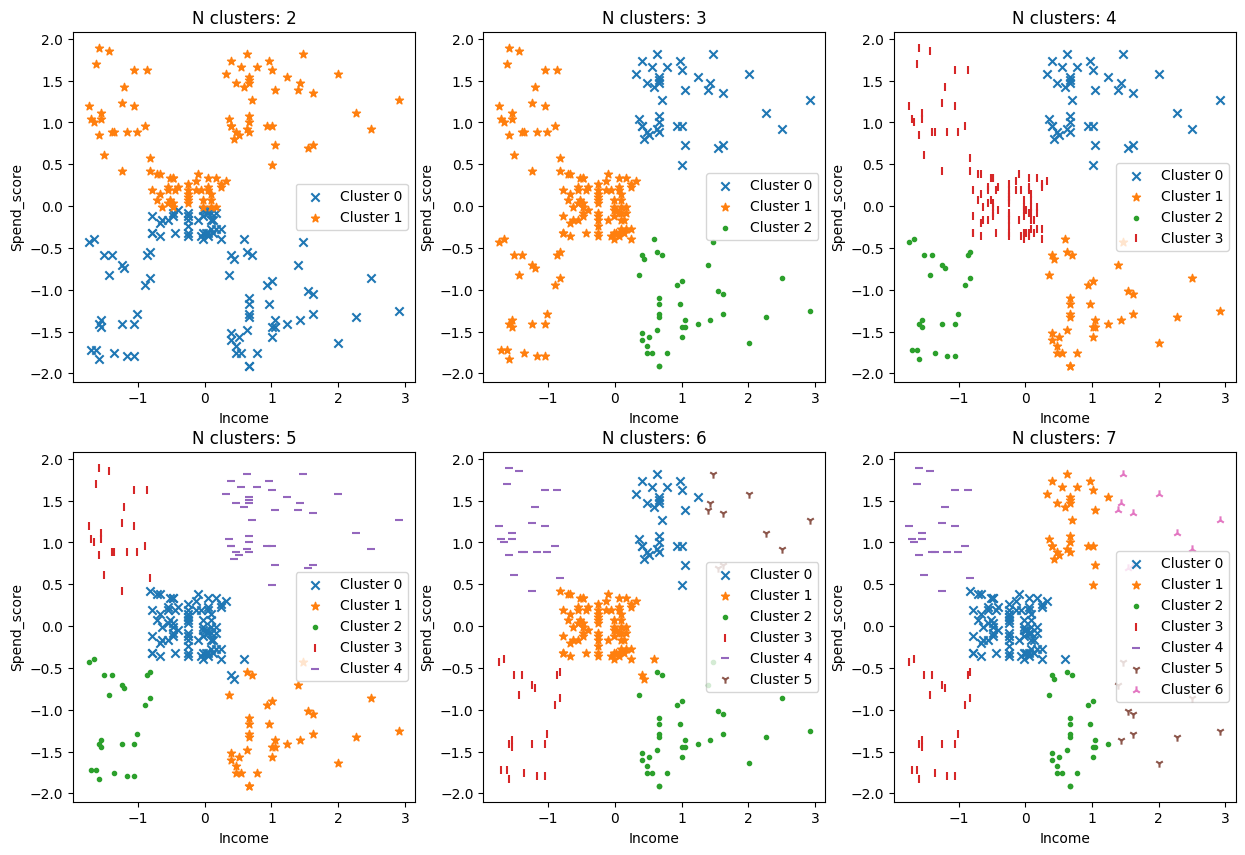

In [15]:
# จากตัวอย่าง 5.1
df = pd.read_csv("data/Mall_Customers.csv")
df.rename({'Annual Income (k$)':'Income',
           'Spending Score (1-100)':'Spend_score'},
          axis=1, inplace=True)

# ตัวอย่าง 5.2
df_scaled = df.copy()
cols_to_scale = ['Age', 'Income', 'Spend_score']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])
df_scaled.head(3)

from sklearn.cluster import KMeans
cluster_cols = ['Income', 'Spend_score']
markers = ['x', '*', '.', '|', '_', '1', '2']

plt.figure(figsize=[15,10])
for n in range(2,8):
    model = KMeans(n_clusters=n, random_state=2024, n_init=10)
    df_scaled['Cluster']= model.fit_predict(df_scaled[cluster_cols])

    plt.subplot(2, 3, n-1)
    for clust in range(n):
        temp = df_scaled[df_scaled.Cluster == clust]
        plt.scatter(temp.Income, temp.Spend_score, 
                    marker=markers[clust], 
                    label="Cluster "+str(clust))
        plt.title("N clusters: "+str(n))
        plt.xlabel('Income')
        plt.ylabel('Spend_score')
        plt.legend()
plt.show()

157.7040081503594


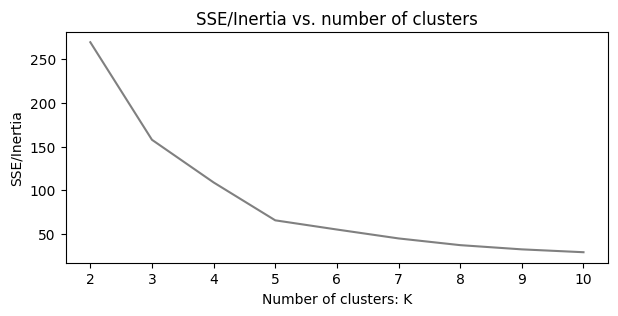

In [17]:
# ตัวอย่าง 5.3 (ทำต่อจากตัวอย่างที่ 5.2)

model = KMeans(n_clusters=3, n_init=10, random_state=2024)
model.fit(df_scaled[cluster_cols])

print(model.inertia_)

X = df_scaled[cluster_cols]

inertia_scores = []
for K in range(2,11):
    inertia = KMeans(n_clusters=K, n_init=10, random_state=2024)\
                    .fit(X).inertia_
    inertia_scores.append(inertia)

plt.figure(figsize=[7,3])
plt.plot(range(2,11), inertia_scores, color='gray')
plt.title("SSE/Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('SSE/Inertia')
plt.show()

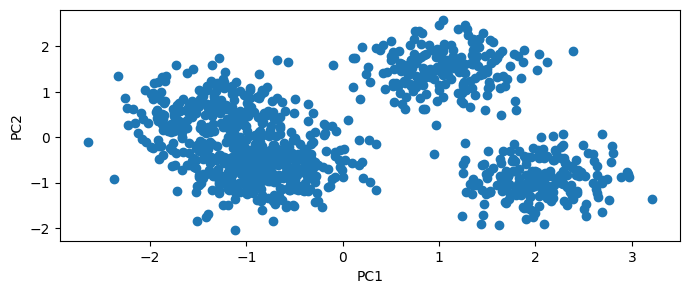

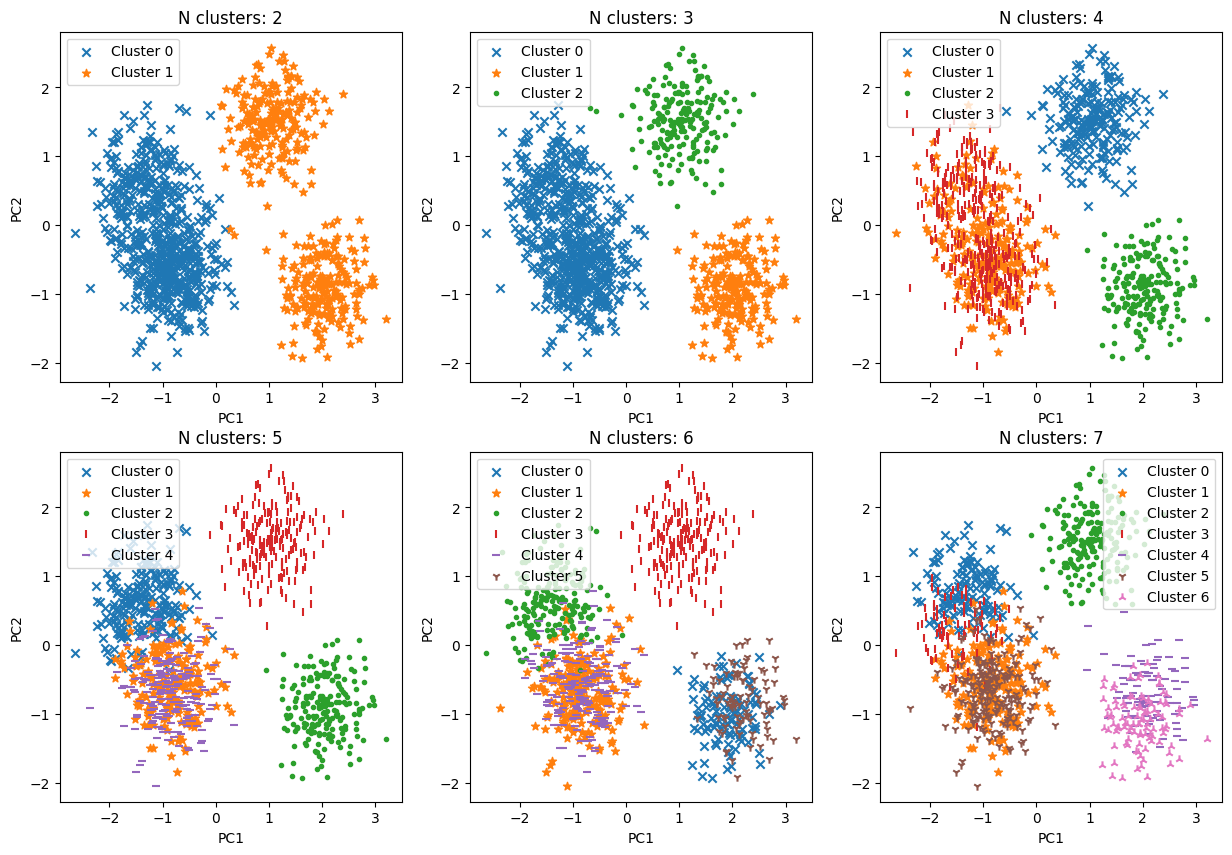

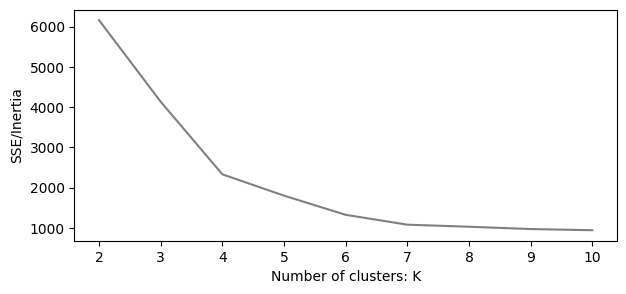

In [22]:
# กิจกรรม 5.1
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

df = pd.read_csv('data/Clothing_customers.csv')
df.columns

cluster_cols = df.columns
df_scaled = df.copy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled[cluster_cols] = scaler.fit_transform(df[cluster_cols])

## PCA
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(df_scaled[cluster_cols])

df_scaled['pc1'] = pca_res[:,0]
df_scaled['pc2'] = pca_res[:,1]

plt.figure(figsize=[8,3])
plt.scatter(df_scaled.pc1, df_scaled.pc2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## KMeans: 2-7 cluster
from sklearn.cluster import KMeans

markers = ['x', '*', '.', '|', '_', '1', '2']

plt.figure(figsize=[15,10])
for n in range(2,8):
    model = KMeans(n_clusters=n, random_state=2024, n_init=10)
    df_scaled['Cluster']= model.fit_predict(df_scaled[cluster_cols])

    plt.subplot(2,3, n-1)
    for clust in range(n):
        temp = df_scaled[df_scaled.Cluster == clust]
        plt.scatter(temp.pc1, temp.pc2, 
                    marker=markers[clust], 
                    label="Cluster "+str(clust))
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.legend()
        plt.title("N clusters: "+str(n))
plt.show()

## elbow method
inertia_scores = []

for k in range(2,11):
    inertia = KMeans(n_clusters=k, random_state=2024, n_init=10)\
              .fit(df_scaled).inertia_
    inertia_scores.append(inertia)

plt.figure(figsize=[7,3])
plt.plot(range(2,11), inertia_scores, color='gray')
plt.xlabel("Number of clusters: K")
plt.ylabel('SSE/Inertia')
plt.show()

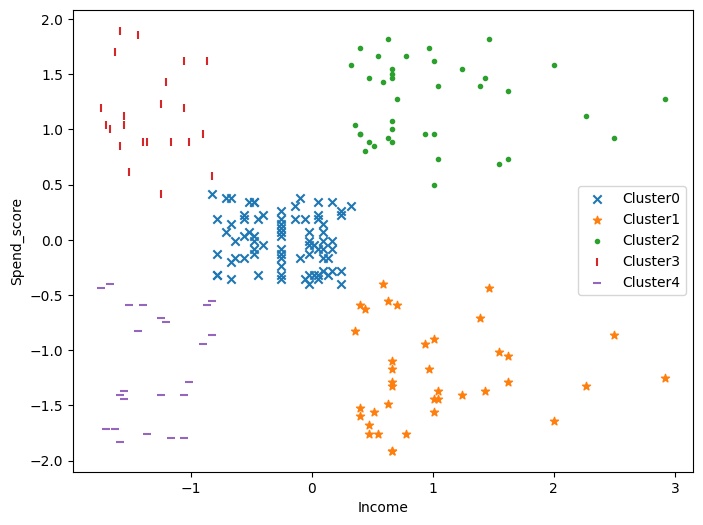

0.6487582521320147


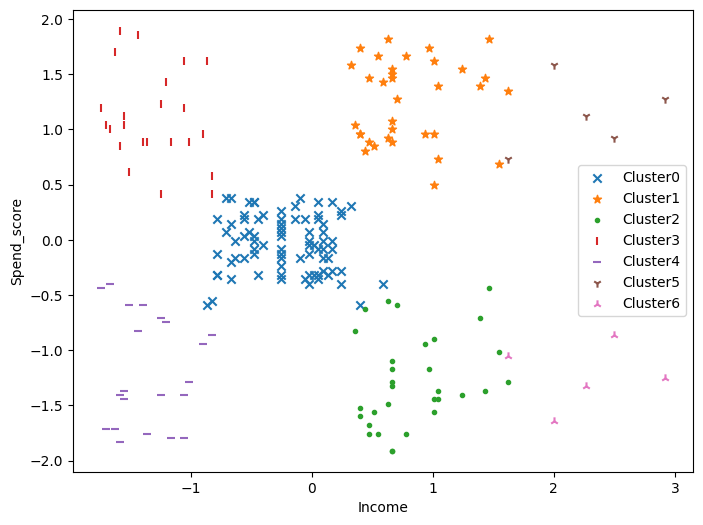

0.8582301835333547


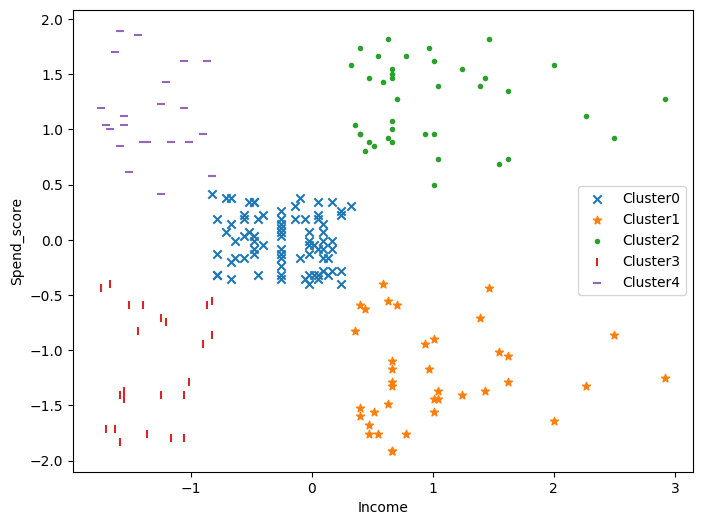

In [26]:
#  จากตัวอย่าง 5.3
df = pd.read_csv("data/Mall_Customers.csv")
df.rename({'Annual Income (k$)':'Income',
           'Spending Score (1-100)':'Spend_score'},
          axis=1, inplace=True)

df_scaled = df.copy()
cluster_cols = ['Income', 'Spend_score']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled[cluster_cols]=scaler.fit_transform(df[cluster_cols])

X = df_scaled[cluster_cols]

# ตัวอย่าง 5.4 (รูปที่ 5.16)
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = 0.9

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df_scaled[cluster_cols])

df_scaled['Cluster']= ms.predict(X)

markers = ['x', '*', '.', '|', '_', '1', '2']

plt.figure(figsize=[8,3])

for clust in range(df_scaled.Cluster.nunique()):
    temp = df_scaled[df_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, 
                marker=markers[clust], label="Cluster"+str(clust))
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.legend()
plt.show()

    ## quantile=0.1
bandwidth = estimate_bandwidth(df_scaled[cluster_cols],quantile=0.1)
print(bandwidth)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df_scaled[cluster_cols])
df_scaled['Cluster']= ms.predict(X)
df_scaled.Cluster.nunique()

plt.figure(figsize=[8,3])
for clust in range(df_scaled.Cluster.nunique()):
    temp = df_scaled[df_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, 
                marker=markers[clust], label="Cluster"+str(clust))
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.legend()
plt.show()

    ## quantile=0.15
bandwidth = estimate_bandwidth(df_scaled[cluster_cols],quantile=0.15)
print(bandwidth)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df_scaled[cluster_cols])
df_scaled['Cluster']= ms.predict(df_scaled[cluster_cols])
df_scaled.Cluster.nunique()

plt.figure(figsize=[8,3])
for clust in range(df_scaled.Cluster.nunique()):
    temp = df_scaled[df_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, 
                marker=markers[clust], label="Cluster"+str(clust))
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.legend()
plt.show()

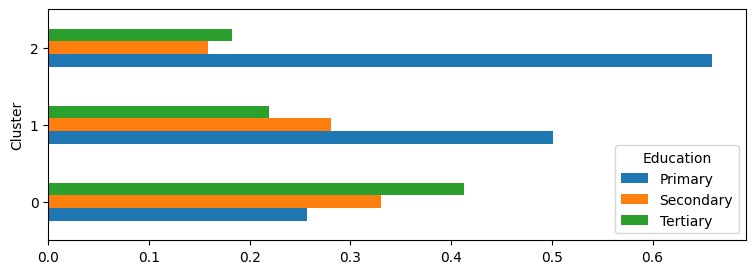

In [2]:
# ตัวอย่าง 5.5 (รูปที่ 5.22)
import pandas as pd, matplotlib.pyplot as plt
bank0 = pd.read_csv("data/Bank_Personal_Loan_Modelling-2.csv")
bank0.head()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

bank_scaled = bank0.copy()
bank_scaled['Income'] = scaler.fit_transform(bank0[['Income']])

## Applying k-prototypes
from kmodes.kprototypes import KPrototypes

cluster_cols = ['Income', 'Education']

kp = KPrototypes(n_clusters=3, random_state=42)
bank_scaled['Cluster'] = kp.fit_predict(bank_scaled[cluster_cols],
                                        categorical=[1])

res=bank_scaled.groupby('Cluster')['Education'].value_counts(normalize=True)
res

res.unstack().plot.barh(figsize=[9,3])
plt.show()

0.3579234303882264


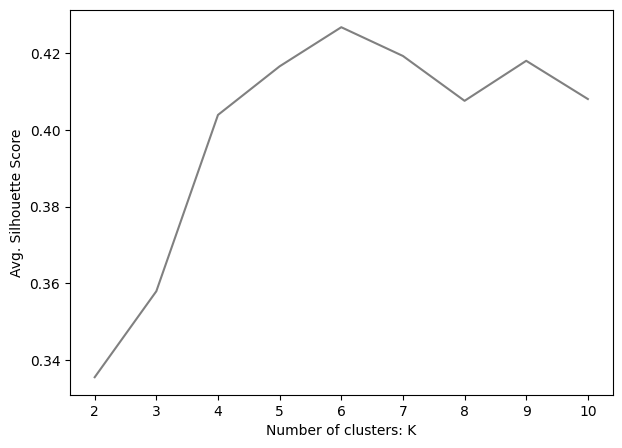

In [12]:
# จากตัวอย่าง 5.1-5.3
df = pd.read_csv("data/Mall_Customers.csv")
df.rename({'Annual Income (k$)':'Income',
           'Spending Score (1-100)':'Spend_score'},
          axis=1, inplace=True)
cols_to_scale = ['Age', 'Income', 'Spend_score']
df_scaled = df.copy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

X = df_scaled[cols_to_scale]

# ตัวอย่าง 5.6 (รูปที่ 5.26)
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=2024, n_init=10)
cluster_assignments = model.fit_predict(X)

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, cluster_assignments)
print(silhouette_avg)

silhouette_scores = []

for K in range(2, 11):
    model = KMeans(n_clusters=K, random_state=2024, n_init=10)
    cluster_assignments = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_assignments)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=[7,5])
plt.plot(range(2,11), silhouette_scores, color='gray')
plt.xlabel("Number of clusters: K")
plt.ylabel('Avg. Silhouette Score')
plt.show() 

(150, 5)
(50, 5)
0.5370676930965995
0.523185799410764


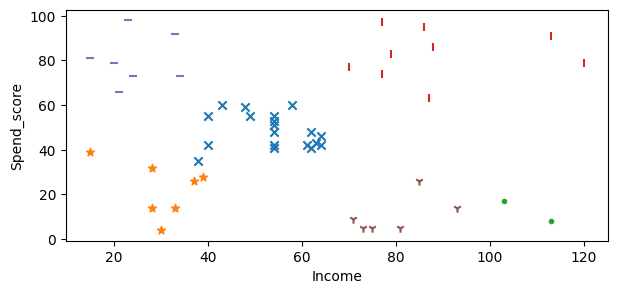

In [43]:
# จากตัวอย่าง 5.1-5.3
import pandas as pd
df = pd.read_csv("data/Mall_Customers.csv")
df.rename({'Annual Income (k$)':'Income',
           'Spending Score (1-100)':'Spend_score'},
          axis=1, inplace=True)
cluster_col = ['Income', 'Spend_score']

# ตัวอย่าง 5.7 (รูปที่ 5.29)
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split\
                    (df, train_size=0.75, random_state=2024)
print(df_train.shape)
print(df_test.shape)

model = KMeans(n_clusters=6, random_state=2024, n_init=10)
df_train['Cluster'] = model.fit_predict(df_train[cluster_cols])
silhouette_avg = silhouette_score(df_train[cluster_cols],
                                  df_train['Cluster'])
print(silhouette_avg)

df_test['Cluster'] = model.predict(df_test[cluster_cols])
silhouette_avg = silhouette_score(df_test[cluster_cols],
                                  df_test['Cluster'])
print(silhouette_avg)

plt.figure(figsize=[7,3])
for clust in range(df_test.Cluster.nunique()):
    temp = df_test[df_test.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, marker=markers[clust])
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.show()

In [ ]:
# กิจกรรม 5.2
import pandas as pd
from sklearn import cluster, metrics
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/customer_offers.csv')
df.head()

from sklearn import model_selection
X_train, X_test = model_selection.train_test_split\
                  (df, random_state=2024)

krange = list(range(2,11))
avg_silhouettes = []
for n in krange:
    model = cluster.KMeans(n_clusters=n, random_state=100)
    model.fit(X_train)
    cluster_assignments = model.predict(X_train)
    silhouette_avg = metrics.silhouette_score(X_train, 
                                              cluster_assignments)
    avg_silhouettes.append(silhouette_avg)

plt.plot(krange, avg_silhouettes, color='gray')
plt.xlabel("Number of clusters")
plt.ylabel("Average Silhouette Score")
plt.show()

model = cluster.KMeans(n_clusters=4, random_state=100)
model.fit(X_train)

km_labels = model.predict(X_test)
km_silhouette = metrics.silhouette_score(X_test, km_labels)
print('k-means silhouette score: ' + str(km_silhouette))

bandwidth = cluster.estimate_bandwidth(X_train, quantile=0.1)

ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

ms_labels = ms.predict(X_test)

ms_silhouette = metrics.silhouette_score(X_test, ms_labels)
print('mean-shift silhouette score: ' + str(ms_silhouette))

from kmodes.kmodes import KModes

krange = list(range(3,11))
avg_silhouettes = []

for n in krange:
    km = KModes(n_clusters=n, random_state=100)
    km.fit(X_train)

    kmode_labels = km.predict(X_train)
    kmode_silhouette = metrics.silhouette_score\
                       (X_train, kmode_labels)
    avg_silhouettes.append(kmode_silhouette)

plt.plot(krange, avg_silhouettes, color='gray')
plt.xlabel("Number of clusters")
plt.ylabel("Average Silhouette Score")
plt.show()

km = KModes(n_clusters=4, random_state=100)
km.fit(X_train)

kmode_labels = km.predict(X_test)
kmode_silhouette = metrics.silhouette_score\
                   (X_test, kmode_labels)
print('k-mode silhouette score: ' + str(kmode_silhouette))